# Endogenous demand and system design

Transit might be provided by the government today, but it's not like elementary education or police service or social security, because people **have a choice of whether to ride**. Transit, then, in some ways is an ordinary consumer product---like Cheerios.

So here's what was unrealistic about the models in [User Inputs and Scale Economies](https://github.com/lewis500/transit/blob/master/User%20Inputs%20and%20Scale%20Economies.ipynb): demand was exogenous (fixed). Ridership $Q$ was a parameter of the problem. As a modelling exercise, we focused in those models on serving that ridership at the lowest possible social cost; but our riders were essentially captive. Our transit agency could have chosen any frequency, route density, price, etc., and people would have been forced to ride. The fact people can choose not to ride your system places a constraint on your design choices, and it can affect your goals. The consequences of making demand endogenous is the point of this lecture.

Suppose demand for your bus line obeys this ridership equation:
$$
Q(P,F) = a - c_P P - \frac{c_W}{2F},
$$
where $P$ is the price of a ticket.


Recall that average wait time is $1/2F$. This equation states that for every unit price rises, demand falls by $c_P$, and for every unit wait time rises, demand falls by $c_W$. This isn't necessarily a very realistic demand equation: the parameters $c_P$ and $c_W$ stay the same no matter what the price and headway are, so increasing the price from $\$1$ to $\$2$ has the same impact as increasing the price from $\$1000$ to $\$1001$. (Yeah right!) But it's simple enough to work with and illustrates the big ideas we are interested in.

The demand equation begets an "inverse demand curve" found by solving for $P$, which is how economists traditionally deal with demand.

$$
P(Q;F) = \frac{1}{c_P}\left(a - Q - \frac{c_W}{2F} \right)
$$

This is the price required to get exactly $Q$ people to ride, given that frequency is $F$.  Lets plot it out for different values of $F$ to see that as $F$ rises, $P()$ shifts upward and to the right.

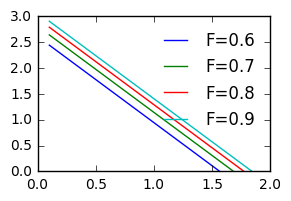

In [2]:
import numpy as np
import matplotlib.pyplot as plt

a = 2.4; c_W = 1; c_F = 0.8; c_P = 0.6; F = 1.0;
PCurve = np.vectorize(lambda Q: 1./c_P* (a - Q - c_W/(2.*F)))
q = np.linspace(.1,2.0)
plt.figure(figsize=(3,2));
for F in [.6,.7,.8,.9]:
    plt.plot(q,PCurve(q), label="F=" + str(F))
plt.ylim([0,plt.ylim()[1]]);plt.legend(frameon=False);plt.show()

So if you set price at some value, then you could keep getting as much ridership as you want by increasing $F$ enough. (Convince yourself of this). The trouble with this plan, of course, is that you'll have to come up with the money to pay for all that frequency.

Let's assume that your service receives $S$ dollars in subsidy from the government. It has to pay for itself through fares and that subsidy; total revenues plus the subsidy must equal or exceed total costs. So if a unit of frequency costs $c_F$, then you need
$$
PQ + S \geq c_FF,
$$
where the left-hand side is total revenues, and the right-hand side is total costs. So for a given frequency $F$, we can draw a line

$$
P = (c_FF-S)/Q,
$$

which gives us all the points $(Q,P)$, where the service makes just enough money to cover its costs. Let's call this the break-even curve.

We now have two equations. One for demand, and another one for supply. Lets plot them next to each other, under the (arbitrary) assumption that $S=0.2$.

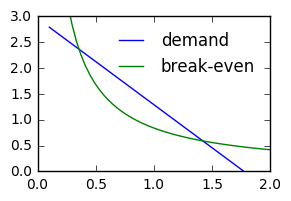

In [4]:
Sigma = 0.2
F = 0.8
BreakEven = np.vectorize(lambda Q: (Sigma + c_F*F)/Q)
plt.figure(figsize=(3,2));
plt.plot(q,PCurve(q),label="demand")
plt.plot(q,BreakEven(q), label="break-even")
plt.legend(frameon=False);plt.ylim([0,3]);plt.show();

The plot shows two points of intersection between the demand curve and the break-even curve. These are price-quantity pairs that satisfy both equations: at these prices, demand is exactly high enough to produce enough revenue to pay for the frequency $F$ that we're offering.

Since there are two points of intersection, there are two prices you could choose and still break even. But common sense should tell you that one is worse for your riders: the high-price, low quantity intersection (on the top left).

## Varying $F$

For the above plot, we've fixed $F=0.8$ to look at one "slice" of the world's possibilities. But we could choose almost any $F$. As $F$ increases, both curves will shift up and to the right: demand shifts upward because people are willing to pay more for high-frequency service, the break-even curve shifts upward because service costs more. 

Let's plot different $F$'s interactively with this [this Desmos notebook](https://www.desmos.com/calculator/auhi2nyfwz). Go ahead and drag $F$ around in the notebook to see the curves shift.

As you increase $F$, notice that the ridership $Q$ (on the x axis) corresponding to the good equilibrium pair (the lower right one) increases at first, but then starts to decline. The reason is that there are diminishing returns to increasing frequency, but linearly increasing costs. So at first people value increases in frequency more than they value the requisite fare increases, but after a point they don't. Here's a beautiful diagram I drew of the effect:

<img src="./increases.png" width="50%")/>

## Feasibility contour

Taken together, these points constrain what combinations of price, ridership and frequency are possible. You can't just pick whatever frequency you want and make people riders for it through higher fares. Only certain choices are *feasible*. Let's sketch all the possibilities for our service---all the $P/Q$ combinations where the break-even and demand curves might intersect. To do so, we'll write the break-even constraint (total revenues equal total costs), in terms of $F$...


$$
PQ+S = c_F F \implies F = \frac{PQ + S}{c_F}.
$$

This is the highest frequency you can pay for given that ridership is $Q$ and price is $P$. Now, to close the loop, we'll plug this value of $F$ into the demand curve...


$$
P(Q;F) = P\left(Q; \frac{PQ+S}{c_F}\right),
$$

which implies

$$
P = \frac{1}{c_P}\left[a - c_P P - \frac{c_W}{2(PQ+S)/c_F} \right].
$$

So we've got everything in terms of $P$ and $Q$ now. The dependence of $F$ on $P$ and $Q$ is baked into the equation.

We can plot this **feasibility contour** in Desmos, with $P$ on the y-axis and $Q$ on the x-axis. To do so, activate the "feasibility contour" plot in the [desmos notebook](https://www.desmos.com/calculator/wpmbjbjgi7). We get a figure like this one:

<img src="./feasible.png" width="400px"/>

The orange line represents all the $(Q,P)$ combinations that are feasible for different values of $F$. To see this, drag the $F$ slider around, and notice how the intersections of the break-even and demand curves always fall along the orange feasibility contour. For most values of $F$, of course, there are two intersections: a high-price, low-ridership one (toward the top-left end of the contour) and a low-price, high-ridership one (towards the bottom-right part).

## Trade-offs

The feasibility contour helps underscore that *there are trade-offs among different goals an agency might pursue.* 

Suppose, for instance, that your goal is to maximize ridership. In that case, you'd want to set $F\simeq1$ (about equal to one), which is the point farthest to the right on the feasibility contour. See below.

<img src="./max_ridership.png"width="350px"/>


But if you wanted to maximize $F$ (provide the most frequent service possible), you could increase $F$ as high as $F\simeq 1.4$ before the break-even curve and the inverse demand curve ceased to intersect. Note, below, that the price at maximum $F$ is several time higher than at the ridership-maximizing level, and ridership is about $3/4$ its maximum attainable value. Why would you want to supply the most frequent service possible? Maybe you want to create a lot of jobs.

<img src="./max_frequency.png"width="350px"/>

Or suppose you wanted to minimize the price for equity reasons. In that case, you'd supply very infrequent service ($F\simeq.34$), and wind up with a low ridership. I'd say this is somewhere around where a lot of US agencies are.

<img src="./min_price.png"width="350px"/>

## Takeaways

Notice that we've been working with a very simple model: frequency is the only design variable. We are ignoring route-mileage, route density, stop spacing, boarding time, etc. Why? To emphasize a simple message: that the agency sometimes cannot pursue some reasonable goals without sacrificing other ones (unless it is already doing a very bad job). The truth is that $F$ here served as a sort of stand-in for any metric of service *quality*---be it route density, the cleanliness of vehicles, stop spacing...pretty much anything that attract people to the service but also costs more money to provide.

As an engineer, you will sometimes be in a situation where some decision-maker thinks they can get a "free lunch," that a new route can be extended or price kept low without sacrificing other goals. Part of your job is to make clear to decision-makers what is realistically attainable and how much is sacrificed in pursuit of each goal.

The nature of these trade-offs depends on external parameters such as the demand curve and the cost of service provision. In our case, these gave rise to a sort of rounded-triangle feasibility contour, but the contour could be a perfect circle or a weird bulge. Please do not pay too much attention to the particulars of the model we used in this lecture; instead be aware of the process by which we obtained the result...forming a single equation that captured our various constraints.